# Automating data analysis and workflows with pyODK
by Hélène Martin on October 19th, 2022

* [Slides](https://docs.google.com/presentation/d/1oJdAdmeCIsGTp9083vAS-c5S5rnaO7e3pxzfFYe9-UI/edit#slide=id.g16c4e809b19_0_0)
* [Recording](https://youtu.be/sIaquyz5bP8) (demo starts [here](https://www.youtube.com/watch?v=sIaquyz5bP8&t=1024s))
* [Participants survey XLSForm](https://docs.google.com/spreadsheets/d/1Sx3N81R2d240WgntS73FcXfGvo-Gr7kKKcn2SCTmsVY/edit#gid=339912049)

[Jupyter Lab](https://jupyter.org/) is an interactive computing environment used in this session. This file is a Jupyter Notebook which can be opened and edited in many platforms including Jupyter Lab. Even Github knows how to show Jupyter Notebooks! When you first open a notebook or if you see it in a view-only platform like Github, the output shown is static, saved from the last run.

If you have any questions or comments, please share them on [the forum](https://forum.getodk.org/c/community/12).

Since many are new to Python and to Jupyter Lab, we started with [Hello, world!](https://en.wikipedia.org/wiki/%22Hello,_World!%22_program) 

In [1]:
print("Hello, world!")

Hello, world!


## Configuring `pyodk` and calling library methods

We looked at how to build a [`pyodk` client](https://github.com/getodk/pyodk#configuration) and make our first request to the ODK Central backend. This client used Hélène's configuration in her home directory. The credentials she entered have access to three projects that we can list using the `pyodk` client's `list` method in the `projects` accessor. In `pyodk`, functionality is organized according to the resource (projects, forms, submissions) that they act on.

If you create your own `.pyodk_config.toml` in your home directory and run the cell below, you will see the projects that your credentials have access to.

In [42]:
from pyodk.client import Client

client = Client()
client.open()
client.projects.list()

[Project(id=38, name='Hélène encrypted', createdAt=datetime.datetime(2021, 4, 26, 18, 36, 51, 785000, tzinfo=datetime.timezone.utc), description=None, archived=None, keyId=19, appUsers=None, forms=None, lastSubmission=None, updatedAt=datetime.datetime(2021, 4, 26, 18, 37, 13, 924000, tzinfo=datetime.timezone.utc), deletedAt=None),
 Project(id=4, name='Impact++', createdAt=datetime.datetime(2021, 1, 31, 21, 52, 30, 606000, tzinfo=datetime.timezone.utc), description=None, archived=None, keyId=None, appUsers=None, forms=None, lastSubmission=None, updatedAt=datetime.datetime(2022, 3, 9, 0, 55, 21, 658000, tzinfo=datetime.timezone.utc), deletedAt=None),
 Project(id=52, name='pyODK webinar', createdAt=datetime.datetime(2022, 10, 18, 16, 17, 33, 980000, tzinfo=datetime.timezone.utc), description='For Oct 19 session on pyODK.', archived=None, keyId=None, appUsers=None, forms=None, lastSubmission=None, updatedAt=datetime.datetime(2022, 10, 19, 4, 42, 1, 824000, tzinfo=datetime.timezone.utc), de

This looks a bit magical! We also wrote a `config.toml` file together and explicitly built a client using that configuration. We specified a cache path as well so that credentials for this configuration get saved separately from those for the client we created above.

We can use multiple clients that connect to multiple servers or use different credentials on the same server in the same program.

In [4]:
viewer_client = Client(config_path="config.toml", cache_path="cache.toml")
viewer_client.open()
viewer_client.projects.list()

[Project(id=52, name='pyODK webinar', createdAt=datetime.datetime(2022, 10, 18, 16, 17, 33, 980000, tzinfo=datetime.timezone.utc), description='For Oct 19 session on pyODK.', archived=None, keyId=None, appUsers=None, forms=None, lastSubmission=None, updatedAt=datetime.datetime(2022, 10, 19, 4, 42, 1, 824000, tzinfo=datetime.timezone.utc), deletedAt=None)]

We can list any type of resource. We get back a list of Python objects with appropriately-typed fields. These objects provide access to the resource metadata.

In [5]:
client.forms.list()

[Form(projectId=52, xmlFormId='foods', name='Favorite foods', version='2022102202', enketoId='DWTgFxdpHhMatjKjFPtAg7pRnvzwMnM', hash='3a0b4f0dc731adca7e6683b1081b8686', state='open', createdAt=datetime.datetime(2022, 10, 19, 5, 34, 26, 659000, tzinfo=datetime.timezone.utc), keyId=None, updatedAt=datetime.datetime(2022, 10, 19, 5, 45, 47, 999000, tzinfo=datetime.timezone.utc), publishedAt=datetime.datetime(2022, 10, 19, 5, 45, 47, 997000, tzinfo=datetime.timezone.utc)),
 Form(projectId=52, xmlFormId='participants', name='pyODK webinar participant survey', version='2022101802', enketoId='pfRYfxj0bOmGyCZnaZ0umsk0AsunD6N', hash='521961ede019cc24ceed078905506fea', state='open', createdAt=datetime.datetime(2022, 10, 19, 4, 39, 46, 62000, tzinfo=datetime.timezone.utc), keyId=None, updatedAt=datetime.datetime(2022, 10, 19, 4, 42, 1, 834000, tzinfo=datetime.timezone.utc), publishedAt=datetime.datetime(2022, 10, 19, 4, 40, 59, 355000, tzinfo=datetime.timezone.utc)),
 Form(projectId=52, xmlFormId

## Learning more about available functionality
We listed submissions as well. For these notes we've commented out the call with a `#` because there are a lot of submissions!

To learn more about the functionality available for each resource type in Jupyter Lab (and most development environments), we can type the name of our client followed by the name of the resource, add a period and then use the tab key to see what is available. For example, to learn more about methods available for submissions, we would type `client.submissions.` and then a tab.

We can also learn more about a specific method by typing its name (or selecting it from the suggestions given as above) and then typing SHIFT+TAB.

In [ ]:
# client.submissions.list(form_id='participants')

Listing submissions gives us a list of objects representing submission metadata. There's a lot we can do with that but typically what we really want is the submission content.

## Getting submission data into pandas

We can get our submission data by using the `get_table` method. This will give us back our data as JSON in a top-level `value` key (for the OData standard). We could use this directly but it's even more convenient to get it into [`pandas`](https://pandas.pydata.org/), a Python library for data manipulation and analysis.

Some good resources for learning about `pandas` and using Python for data analysis and manipulation are:
- [The `pandas` Getting Started guide](https://pandas.pydata.org/docs/getting_started/index.html) - great tutorials on focused topics
- [Kaggle](https://www.kaggle.com/learn/pandas) - well-structured longer tutorials with exercises to check your understanding

There are also large numbers of courses through Udemy, EdX, etc, some of which provide certificates.

`pyodk` helps build a bridge into `pandas` directly from ODK Central so that we don't have to manage versioning of our dataset and can use Central as the ultimate source of truth. This is helpful for monitoring data as it comes in and should work smoothly for over a million indicators (submission count times field count). With large submission sets, we will be limited by our Internet connection and server RAM and CPU.

Once we're in `pandas`, there's nothing special about ODK data! Note that we can also use all of these techniques on a CSV export from Central.

`get_table` has several parameters that can be passed into it to do things like filter the submissions we request. Use SHIFT+TAB as described above to see what they are.

In [43]:
json = client.submissions.get_table(form_id='participants')['value']

import pandas as pd
df = pd.json_normalize(json, sep='-')
df.head(3)

,__id,note_welcome,height_units,height_feet,height_meters,height,note_height_meters,pets,book,liked-type,...,__system-updatedAt,__system-submitterId,__system-submitterName,__system-attachmentsPresent,__system-attachmentsExpected,__system-status,__system-reviewState,__system-deviceId,__system-edits,__system-formVersion
0,uuid:670fa9de-9191-4968-a08e-1aba8061d0e0,None,ft,7.99,NaN,2.43,None,n,3,Point,...,None,711,Participant,0,0,None,None,None,0,2022101802
1,uuid:afe70664-6670-4ff1-8efc-a23eb0c6ec89,None,ft,3.01,NaN,0.92,None,y,Mr Muscle,Point,...,None,711,Participant,0,0,None,None,None,0,2022101802
2,uuid:f75e9730-89d8-407d-ba2a-9990ce90233f,None,m,NaN,1.89,1.89,None,n,Gamba,Point,...,None,711,Participant,0,0,None,None,None,0,2022101802


Once our data is in `pandas`, we have access to powerful data cleaning and analysis tools.

We looked at quick ways to make plots:

<AxesSubplot:ylabel='pets'>

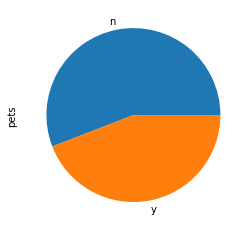

In [55]:
df.pets.value_counts().plot(kind='pie')

We also plotted the pets column and noticed that it has the exact same shape! Are the two correlated?

In [52]:
df['height_code'] = df.height_units.astype('category').cat.codes
df['pets_code'] = df.pets.astype('category').cat.codes
df.pets_code.corr(df.height_code)

-0.4035087719298247

No, that's a pretty weak correlation so it's really a coincidence that the number of people who prefer `meters` is the same as the number of people who don't have pets. Too bad, I had made up a whole story in my head about Americans and pets.

Anyway, hopefully this illustrates that it's relatively quick and fun to explore data in this way.

`pandas` can also give us a really nice standard summary of numeric columns:

In [15]:
df.height.describe()

count    34.000000
mean      1.747941
std       0.211914
min       0.920000
25%       1.700000
50%       1.760000
75%       1.820000
max       2.430000
Name: height, dtype: float64

And we can do analysis on metadata as well as customize the plots:

<AxesSubplot:>

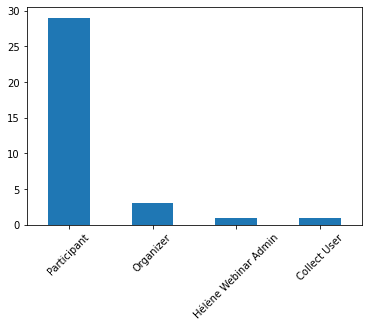

In [45]:
df['__system-submitterName'].value_counts().plot(kind='bar', rot=45)

The examples above focus on analysis. We can also manipulate the data to clean it. For example, if we prefix all notes in our XLSForm with `note_`, we can remove them from the data table in a single step:

In [58]:
df = df.drop(df.filter(regex = 'note_'), axis = 1)

## Analyzing data from forms with repeats

We quickly went through an example of joining repeat data to the base form data. You can see the example worked in more detail [here](https://github.com/getodk/pyodk/blob/master/examples/working-with-repeats.ipynb).

## Using HTTP verb methods to make direct calls to the API

Our goal is to make many common workflow automation tasks directly available in `pyodk` as nice library methods. We haven't implemented most of those yet, though. You can still access the full Central API with the convenience of a configured `pyodk` client by using HTTP verb methods on your `Client` object.

We briefly looked at how to use the [Central API docs](https://docs.getodk.org/central-api/) to make the right calls. You can see a worked example [here](https://github.com/getodk/pyodk/blob/master/examples/beyond-library-methods.ipynb).

There's also a longer sample script [here](https://github.com/getodk/pyodk/blob/master/examples/app_user_provisioner.py) that shows provisioning App Users from a file of names and generating custom QR codes for each of them.